<a href="https://colab.research.google.com/github/victorluis22/metodos-numericos-otimizacao/blob/main/newton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de Newton

Algoritmo para minimizar funções unidimensionais usando derivadas.


In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plotFunction(min, max, step):
  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.title(f'Gráfico da função')
  plt.grid(True)

  x_values = np.arange(min, max+step, step)
  y_values = [f(x) for x in x_values]

  plt.plot(x_values, y_values, label=f'f(x)')
  plt.legend()
  plt.show()

def f(x):
  function1 = "x**6 - (52/25)*x**5 + (39/80)*x**4 + (71/10)*x**3 - (79/20)*x**2 - x + (1/10)"
  function2 = "0.000089248*x - 0.0218343*x**2 + 0.998266*x**3 - 1.6995*x**4 + 0.2*x**5"
  function3 = "4*x**2 - 4*x**3 + x**4"

  return eval(function3)

def deriv_f(x, h):
  return (f(x + h) - f(x - h))/(2*h)

def deriv2_f(x, h):
  return (f(x-h) + f(x+h) - 2*f(x))/(h**2)

def newtonSearch(x):
  lmbda = x
  lmbda_next = 0
  e = 10**-6
  h = 10**-6
  time = 0

  while True:
    lmbda_next = lmbda - (deriv_f(lmbda, h) / deriv2_f(lmbda, h))

    addData(time, lmbda, lmbda_next, h)

    if abs(lmbda_next - lmbda) < e:
      return f(lmbda_next), lmbda_next
    else:
      lmbda = lmbda_next

    time += 1


def addData (time, lmbda, lmbda_next, h):
  data['Iteração'].append(time)
  data['λ'].append(lmbda)
  data['θ\'(λ)'].append(deriv_f(lmbda, h))
  data['θ\'\'(λ)'].append(deriv2_f(lmbda, h))
  data['λk+1'].append(lmbda_next)

data = {
        'Iteração': [],
        'λ': [],
        'θ\'(λ)': [],
        'θ\'\'(λ)': [],
        'λk+1': [],
}

Mínimo encontrado: f(x) = 9.999999997893958e-25, x=4.999999999474739e-13



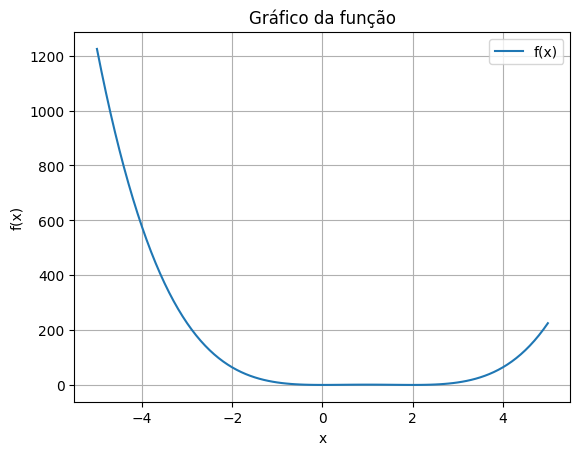

,Iteração,λ,θ'(λ),θ''(λ),λk+1
0,0,0.000000e+00,-4.000000e-12,8.000000,5.000000e-13
1,0,1.000000e+00,2.775558e-10,-3.999912,1.000000e+00
2,0,3.000000e+00,2.400000e+01,43.996806,2.454506e+00
3,1,2.454506e+00,6.490513e+00,21.373125,2.150829e+00
4,2,2.150829e+00,1.493356e+00,11.887380,2.025204e+00
5,3,2.025204e+00,2.093207e-01,8.601120,2.000868e+00
6,4,2.000868e+00,6.951094e-03,8.022027,2.000001e+00
7,5,2.000001e+00,1.004530e-05,7.997158,2.000000e+00
8,6,2.000000e+00,0.000000e+00,8.000711,2.000000e+00
9,0,2.000000e+00,-2.664535e-09,7.998935,2.000000e+00


In [21]:
a = -5
b = 5
minimun, x_minimun = newtonSearch(-1)

print(f'Mínimo encontrado: f(x) = {minimun}, x={x_minimun}\n')

plotFunction(a, b, 0.1)

df = pd.DataFrame(data)
display(df)